In [27]:
! unzip Dataset.zip


Archive:  Dataset.zip
   creating: Dataset/
   creating: Dataset/sedan/
  inflating: Dataset/sedan/sedan1.jpg  
  inflating: Dataset/sedan/sedan2.jpg  
  inflating: Dataset/sedan/sedan3.jpg  
  inflating: Dataset/sedan/sedan4.jpg  
  inflating: Dataset/sedan/sedan5.jpg  
  inflating: Dataset/sedan/sedan6.jpg  
  inflating: Dataset/sedan/sedan7.jpg  
  inflating: Dataset/sedan/sedan8.jpg  
  inflating: Dataset/sedan/sedan9.jpg  
  inflating: Dataset/sedan/sedan10.jpg  
  inflating: Dataset/sedan/sedan11.jpg  
  inflating: Dataset/sedan/sedan12.jpg  
  inflating: Dataset/sedan/sedan13.jpg  
  inflating: Dataset/sedan/sedan14.jpg  
  inflating: Dataset/sedan/sedan15.jpg  
  inflating: Dataset/sedan/sedan16.jpg  
  inflating: Dataset/sedan/sedan17.jpg  
  inflating: Dataset/sedan/sedan18.jpg  
  inflating: Dataset/sedan/sedan19.jpg  
  inflating: Dataset/sedan/sedan20.jpg  
  inflating: Dataset/sedan/sedan21.jpg  
  inflating: Dataset/sedan/sedan22.jpg  
  inflating: Dataset/sedan/sedan23.

Found 457 files belonging to 5 classes.
Using 366 files for training.
Found 457 files belonging to 5 classes.
Using 91 files for validation.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/10
12/12 [=======

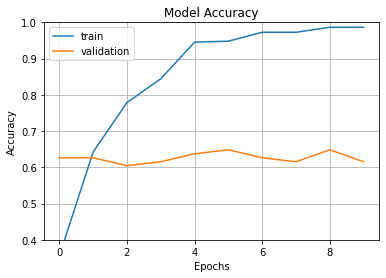

working fine


In [29]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


data_dir="Dataset"

#splitting the data for testing and training
#Training
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

#validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

#classes
class_names=train_ds.class_names
#print(class_names)

#training the model
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

input_shape=(None,180,180,3)
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))
resnet_model.build(input_shape)
resnet_model.summary()

resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

#training the dataset
epochs=10
history=resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

#at the end there is over fitting

#making predictions




Your message has successfully been sent!


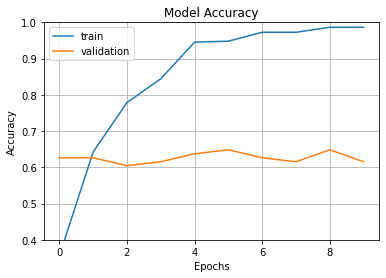

In [30]:
import urllib.request
msg=str(history.history['accuracy'])
msg = msg.replace(' ', "%20")
msg = msg.replace('\n', "%0A")
b=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=D39DI4XQAKQ49C8N&field1='+msg)
print("\nYour message has successfully been sent!")

import requests
msg=requests.get("https://thingspeak.com/channels/1579755/field/1")
msg=msg.json()['feeds'][-1]['field1']
print("\nThe Message sent was: \n\n"+str(msg))

#evaluating the model
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


In [31]:
import requests
msg=requests.get("https://thingspeak.com/channels/1579755/field/1")
msg=msg.json()['feeds'][-1]['field1']
print("\nThe Message sent was: \n\n"+str(msg))


The Message sent was: 

[0.35519126057624817, 0.6420764923095703, 0.7786885499954224, 0.8442623019218445, 0.9453551769256592, 0.9480874538421631, 0.9726775884628296, 0.9726775884628296, 0.9863387942314148, 0.9863387942314148]


In [43]:
msg=str(history.history['val_accuracy'])
msg = msg.replace(' ', "%20")
msg = msg.replace('\n', "%0A")
b=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=D39DI4XQAKQ49C8N&field2='+msg)
print("\nYour message has successfully been sent!")


Your message has successfully been sent!


In [44]:

msg=requests.get("https://thingspeak.com/channels/1579755/field/2")
msg=msg.json()['feeds'][-1]['field2']
print("\nThe Message sent was: \n\n"+str(msg))


The Message sent was: 

[0.6263736486434937, 0.6263736486434937, 0.6043956279754639, 0.6153846383094788, 0.6373626589775085, 0.6483516693115234, 0.6263736486434937, 0.6153846383094788, 0.6483516693115234, 0.6153846383094788]


In [32]:
score=resnet_model.evaluate(train_ds,verbose=0)

In [33]:
print("test loss: ",score[0])
print("test accuracy: ",score[1])

test loss:  0.060883622616529465
test accuracy:  0.9890710115432739


In [52]:
image=cv2.imread("Dataset/Van/4f882400685ec498.jpg",-1)
print(image)
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
pred=resnet_model.predict(image)
output_class=class_names[np.argmax(pred)]


[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [245 246 242]
  [245 246 242]
  [245 246 242]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [245 246 242]
  [245 246 242]
  [245 246 242]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [245 246 242]
  [245 246 242]
  [245 246 242]]

 ...

 [[145 164 167]
  [149 168 171]
  [147 167 168]
  ...
  [136 169 189]
  [139 170 191]
  [141 172 193]]

 [[151 172 174]
  [149 170 172]
  [146 167 168]
  ...
  [135 168 188]
  [137 168 189]
  [138 169 190]]

 [[137 160 162]
  [130 153 155]
  [126 149 151]
  ...
  [135 168 188]
  [136 167 188]
  [135 166 187]]]


In [53]:
print("The predicted class is", output_class)

The predicted class is Van


In [54]:

msg=str(output_class)
msg = msg.replace(' ', "%20")
msg = msg.replace('\n', "%0A")
b=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=D39DI4XQAKQ49C8N&field3='+msg)
print("\nYour message has successfully been sent!")


Your message has successfully been sent!


In [55]:
msg=requests.get("https://thingspeak.com/channels/1579755/field/3")
msg=msg.json()['feeds'][-1]['field3']
print("\nThe Message sent was: \n\n"+str(msg))


The Message sent was: 

Van
